# CAPSTONE 3 MUHAMMAD NAFI ADZIQ (SAUDI ARABIA USED CARS)

## Background

syarah.com is a website specified for buying or selling used cars in saudi arabia. Customers are searching for a specific way to predict car pricing based on their features, thats where our responsibilities are headed.

In this session we will be making a machine learning project based on Saudi Arabia used cars from datasets retrieved on 'syarah.com'. The recorded amount of data in the dataset is percisely 5624 datas which will be cleaned to pull out a clean context for data exploration and understanding.

This machine learning project targets on predicting used car prices based on their available informations. With this informations, <b>car dealerships</b> can benefit the machine learning program by easily achieving used car price estimation based on the specified information for <b>people intrested in buying</b> or <b>selling used cars</b>.

### Problem Spesification for Stakeholders

**Customers (purchaser & seller)**

Customers are having unsure thoughts on price estimation based on car informations and still uncertain with our price estimator program because the estimated price accuracy is not yet reliable. This problem should have its solution immediately improve business decision making capability. With improved business decision making capability, we can set a final projection of this program for the specified stakeholder as to earn price calculation generator and increase customer reliability with the program.


### Data Understanding

The dataset consists of 5624 datas descripting used car informations. Each row holds each of used car information ready to be bought.

The folowing list are a list of columns available on 'data_saudi_used_cars.csv':

**Boolean**

- Negotiable: True if the price is 0, that means it is negotiable.

**Categorical**

- Type: Type of used car.
- Region: The region in which the used car was offered for sale.
- Make: The company name.
- Gear_Type: Gear type size of used car.
- Origin: Origin of used car.
- Options: Options of used car.

**Numerical**

- Year: Manufacturing year.
- Engine_Size: The engine size of used car.
- Mileage: Mileage of used car	
- Price: Used car price.

## **1. Dataset Loading**

In [68]:
# Importing Essentials

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder

# scalingaaaaaa
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# metric
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# feature selction
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [2]:
# Read CSV

df = pd.read_csv('data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [4]:
df.shape

(5624, 11)

## **2. Data Cleaning**

In [5]:
# Remove Negotiable

df = df[df['Negotiable']==False]
df = df.drop(columns = 'Negotiable')
df = df.reset_index(drop = True)

df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000


**In column negotiable, it is said that if it is negotiable then the price is put to zero. Our main goal is to predict pricing**

### **Null Value**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3828 non-null   object 
 1   Region       3828 non-null   object 
 2   Make         3828 non-null   object 
 3   Gear_Type    3828 non-null   object 
 4   Origin       3828 non-null   object 
 5   Options      3828 non-null   object 
 6   Year         3828 non-null   int64  
 7   Engine_Size  3828 non-null   float64
 8   Mileage      3828 non-null   int64  
 9   Price        3828 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 299.2+ KB


**Fortunately, our dataset does not contain any null value**

### **Duplicated Value**

In [7]:
df.duplicated().sum()

3

In [8]:
df = df.drop_duplicates()

**Because the duplicates is very low compared to the whole data, it is permissible for us to remove it**

In [9]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,3825.000000,3825.000000,3.825000e+03,3825.000000
mean,2014.850458,3.180993,1.426426e+05,77998.847843
std,5.110455,1.458662,3.783470e+05,72749.607662
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2013.000000,2.000000,4.800000e+04,35000.000000
50%,2016.000000,2.700000,1.030000e+05,58000.000000
75%,2018.000000,4.000000,1.830000e+05,94000.000000
max,2021.000000,9.000000,2.000000e+07,850000.000000


In [10]:
df['Year'] = df['Year'].astype('str')

**The column year will be changed to a string data type because it does not represent continous time**

In [11]:
df['Year'].describe()

count     3825
unique      41
top       2016
freq       608
Name: Year, dtype: object

**After changing column 'Year' to an object, we can see that the modus for column data is 2016**

In [12]:
df.describe(include = 'object')

,Type,Region,Make,Gear_Type,Origin,Options,Year
count,3825,3825,3825,3825,3825,3825,3825
unique,320,27,56,2,4,3,41
top,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2016
freq,149,1616,890,3421,2893,1473,608


In [13]:
df.shape

(3825, 10)

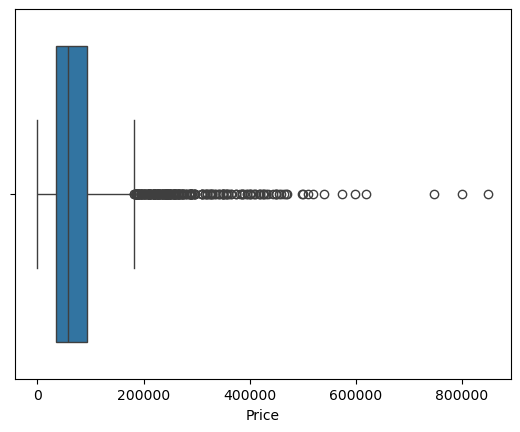

In [14]:
sns.boxplot(df, x = 'Price');

**The boxplot represents the data distribution on the target column**

In [15]:
df[df['Price'] > 700000]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
2403,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,850000
2914,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,748000
3194,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,800000


**After thoroughly studying the dataset, we decided to keep the outliers because the features correlates to the price**

### **Data Distribution**

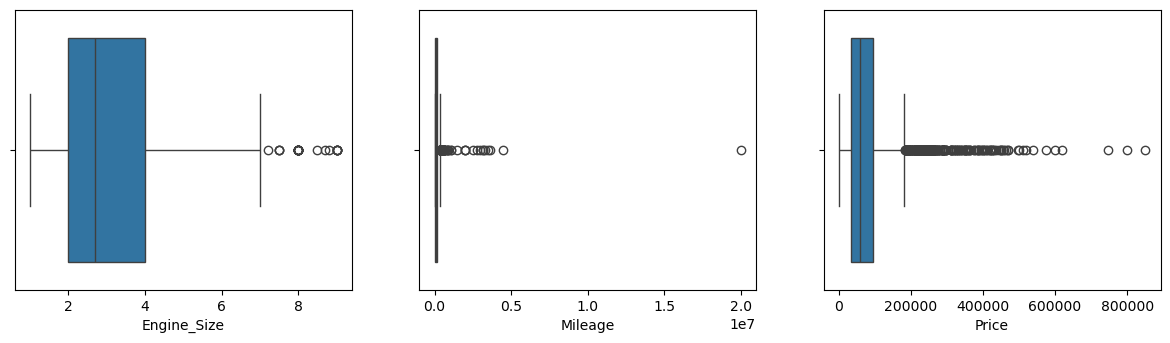

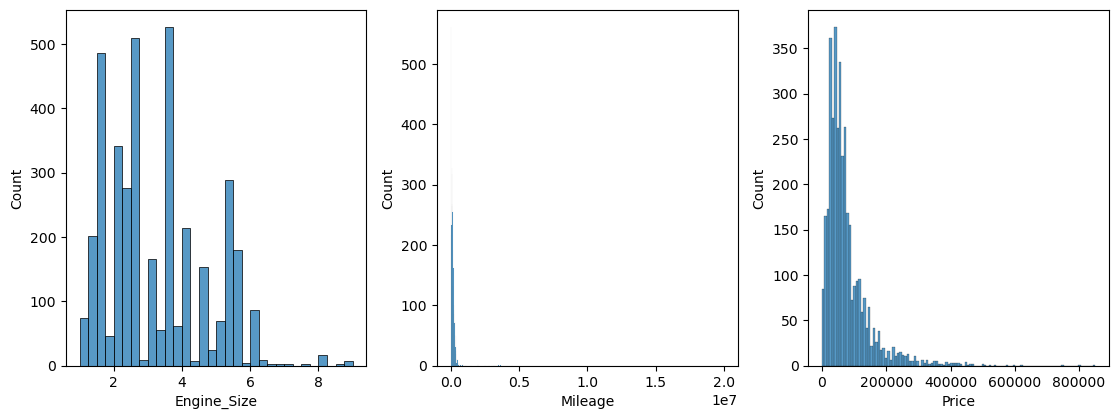

In [16]:
num_col = ['Engine_Size', 'Mileage', 'Price']

plt.figure(figsize = (20,8))

for i, col in enumerate(num_col, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(df, x = col)

plt.figure(figsize=(15,8))
for i, col in enumerate(num_col, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df, x= col)

plt.tight_layout()

**None of the data distributes evenly, but one thing to note is the feature 'Mileage'. Feature 'Mileage' distribution is too extreme to be ignored**

In [17]:
df.describe()

,Engine_Size,Mileage,Price
count,3825.000000,3.825000e+03,3825.000000
mean,3.180993,1.426426e+05,77998.847843
std,1.458662,3.783470e+05,72749.607662
min,1.000000,1.000000e+02,0.000000
25%,2.000000,4.800000e+04,35000.000000
50%,2.700000,1.030000e+05,58000.000000
75%,4.000000,1.830000e+05,94000.000000
max,9.000000,2.000000e+07,850000.000000


**Looking at the data distributions, we could see that there is an odd visualization on feature 'Mileage'.**

In [18]:
df['Mileage'].max()

20000000

**With domain knowledge, it is not possible to travel 20 million miles with a singular vehicle, thus this outlier will be removed.**

In [19]:
df = df[df['Mileage'] != 20000000]

In [20]:
df['Mileage'].max()

4500000

**Meanwhile traveling 4.5 million miles with a singular vehicle is still a possibility**

## **3. EDA and Data Understanding**

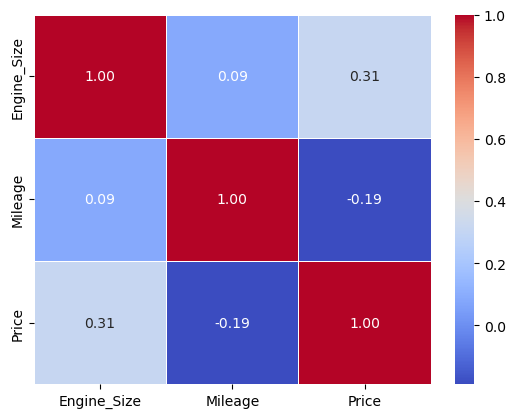

In [21]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5);

**Insigth**
- **Multicolinearity will not be a difficulty in this dataset.**
- **No feature correlates with other feature extremely.**

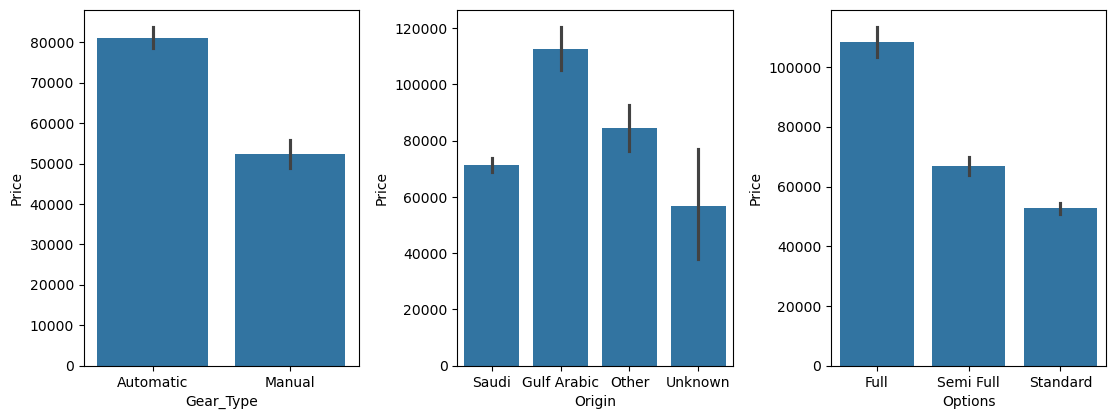

In [22]:
cat_col = ['Gear_Type', 'Origin', 'Options']

plt.figure(figsize=(15,8))

for i, col in enumerate(cat_col, 1):
    plt.subplot(2, 4, i)
    sns.barplot(df, x = col, y = 'Price')

plt.tight_layout()

**Insight**
- **Automatic cars are more preferable compared to manual cars.**
- **Cars in Gulf Arabic is the most expensive compared to every region.**
- **Fully designed cars is considered as luxurious cars.**

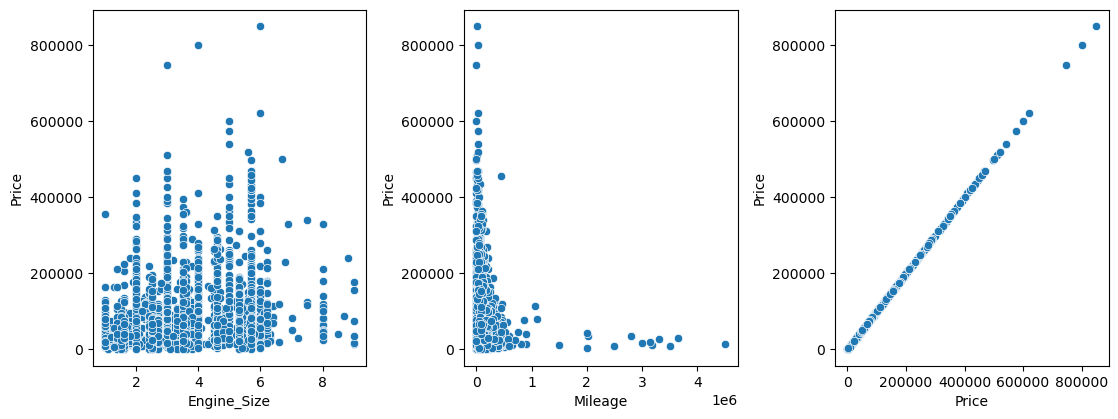

In [23]:
plt.figure(figsize=(15,8))
for i, col in enumerate(num_col, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(df, x= col, y = 'Price')

plt.tight_layout()

**Insight**
- **Cars with less milage has more value.**

## **4. Define Features and Target**

In [24]:
X = df.drop(columns = 'Price')
y = df['Price']

In [25]:
X

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000
...,...,...,...,...,...,...,...,...,...
3823,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500
3824,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000
3825,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794
3826,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000


**Features**

In [26]:
y

0       120000
1       260000
2        42000
3        58000
4        85000
         ...  
3823    132000
3824     50000
3825     68000
3826    145000
3827    154000
Name: Price, Length: 3824, dtype: int64

**Target**

## **5. Data Splitting**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)

Explanation;

- The dataset is divided into 4 parts, 2 train sets and 2 test sets.

- 'test_size = 0.2' means that the test set is only 20% of the dataset.

- 'random_state = 0' is placed so that it doesnt randomize to unrelated randoms.

In [28]:
X.shape

(3824, 9)

In [29]:
X_train.shape

(3059, 9)

In [30]:
X_test.shape

(765, 9)

## **6. Preprocessing**

In [31]:
df.describe(include = 'all')

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
count,3824,3824,3824,3824,3824,3824,3824,3824.000000,3.824000e+03,3824.000000
unique,320,27,56,2,4,3,41,NaN,NaN,NaN
top,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2016,NaN,NaN,NaN
freq,149,1615,890,3421,2893,1473,608,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.181407,1.374498e+05,78016.891475
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.458629,2.000355e+05,72750.561230
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000e+02,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,4.800000e+04,35000.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,1.030000e+05,58000.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,1.830000e+05,94250.000000


Encoding:
- Onehot = 'Gear_Type', 'Origin', 'Options'.
- Binary = 'Type', 'Region', 'Make'.

Scaler:
- Robust = 'Engine_size', 'Mileage'.

In [32]:
num_cols = ['Engine_Size', 'Mileage']
onehot_cols = ['Gear_Type', 'Origin', 'Options']
binary_cols = ['Type', 'Region', 'Make']

transformer = ColumnTransformer([
    ('Binary_Encoder', BinaryEncoder(), binary_cols),
    ('Robust_Scaler', RobustScaler(), num_cols),
    ('OneHot_Encoder', OneHotEncoder(drop = 'first'), onehot_cols),
], remainder= 'passthrough',
      force_int_remainder_cols=False  
)

Explanation;

- OneHotEncoding is used to features that does not have a lot of unique values.

- Binary encoding is used to features that have a lot of unique values.

- Robust scaler is to generalize the scale of selected feature.

- 'Remainder = passthrough' is so that any features that is not selected to be preprocessed is ignored

## **7. Modeling**

**For the temporary model we will use the linear regression model because it is quick to train and easier to interpret**

In [83]:
# Temporary Modeling

model = LinearRegression()

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model),
])

pipe_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('Binary_Encoder',
                                                  BinaryEncoder(),
                                                  ['Type', 'Region', 'Make']),
                                                 ('Robust_Scaler',
                                                  RobustScaler(),
                                                  ['Engine_Size', 'Mileage']),
                                                 ('OneHot_Encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options'])])),
                ('modeling', LinearRegression())])

In [35]:
y_pred = pipe_model.predict(X_test)

**As for temporary metric we'll use mean absolute error because it is simple and interpretable**

In [36]:
linear_reg_mae = mean_absolute_error(y_test, y_pred)
linear_reg_mae

33731.8190205562

In [82]:
features = pipe_model.named_steps['preprocessing'].get_feature_names_out()
feat_name = [feat.split('__')[1] for feat in features]
len(feat_name)

29

In [38]:
print(linear_reg_mae, 'Linear Regression Without Tuning')

33731.8190205562 Linear Regression Without Tuning


In [39]:
y_test.mean()

77348.47189542484

**With linear regression we can have a mean absolute residual of 34751, compared to the mean of the test set 80725 the MAE of linear regression is off by 43% from the actual value which is not good.**

### **Feature Importances**

In [84]:
perm_imp = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=0)

for i in perm_imp.importances_mean.argsort()[::-1]:
    print(f"{X_train.columns[i]}: {perm_imp.importances_mean[i]:.4f}")

Year: 0.7557
Type: 0.2440
Engine_Size: 0.1015
Make: 0.1004
Mileage: 0.0177
Region: 0.0148
Options: 0.0083
Gear_Type: 0.0010
Origin: -0.0008


**There are features that cannot be removed, but there are also features that does not impact target predicting.**

### **Feature Selection**

In [96]:
feat_select = SelectKBest(k = 9)

pipe_model_feat_select = Pipeline([
    ('preprocessing', transformer),
    ('feature selection', feat_select),
    ('modeling', model),
])

pipe_model_feat_select.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('Binary_Encoder',
                                                  BinaryEncoder(),
                                                  ['Type', 'Region', 'Make']),
                                                 ('Robust_Scaler',
                                                  RobustScaler(),
                                                  ['Engine_Size', 'Mileage']),
                                                 ('OneHot_Encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options'])])),
                ('feature selection', SelectKBest(k=9)),
                ('modeling', LinearRegression())])

In [97]:
y_pred_feat_select = pipe_model_feat_select.predict(X_test)
y_pred_feat_select[0]

51508.58423220925

In [98]:
linear_reg_feat_select_mae = mean_absolute_error(y_test, y_pred_feat_select)

In [99]:
print(linear_reg_mae, 'Linear Regression Without Tuning')
print(linear_reg_feat_select_mae, 'Linear Regression Without Tuning Feature Selected')

33731.8190205562 Linear Regression Without Tuning
34436.43865427511 Linear Regression Without Tuning Feature Selected


**Feature Selection is attempted because of low importances in feature, but removing those unimportant features increases the error value.** 

**We wont be using feature selection**

## **8. Cross Validation**

**With cross validation we can obtain the best model by using cross validation score**

### **MAE**

In [103]:
pd.set_option('display.max_colwidth', None)

models = {'Linear Regression': LinearRegression(),
          'K Neighbor Regressor': KNeighborsRegressor(),
          'Decision Tree Regressor': DecisionTreeRegressor()}

score = []

for name, model in models.items():
    
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', model)
    ])
    
    cv_scores = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring='neg_mean_absolute_error'
    )
    
    score.append({
        'algoritma': name,
        'errors': cv_scores.round(2),
        'mean_error': cv_scores.mean().round(3),
        'std_score': cv_scores.std().round(3)
    })

cv_score_df = pd.DataFrame(score)
cv_score_df

,algoritma,errors,mean_error,std_score
0,Linear Regression,"[-34013.73, -34948.46, -37034.65, -38467.3, -37612.33]",-36415.2940,1670.1100
1,K Neighbor Regressor,"[-27115.19, -26398.43, -28479.56, -32194.53, -29732.91]",-28784.1250,2054.2970
2,Decision Tree Regressor,"[-29662.95, -30121.27, -30419.14, -33572.79, -32950.29]",-31345.2880,1595.2480


**For MAE we shall use K Neighbor Regressor because it has the lowest error and lowest std score**

### **RMSE**

In [41]:
pd.set_option('display.max_colwidth', None)

models = {'Linear Regression': LinearRegression(),
          'K Neighbor Regressor': KNeighborsRegressor(),
          'Decision Tree Regressor': DecisionTreeRegressor()}

score = []

for name, model in models.items():
    
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', model)
    ])
    
    cv_scores = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring='neg_root_mean_squared_error'
    )
    
    score.append({
        'algoritma': name,
        'errors': cv_scores.round(2),
        'RMSE_error': cv_scores.mean().round(3),
        'std_score': cv_scores.std().round(3)
    })

cv_score_df = pd.DataFrame(score)
cv_score_df

,algoritma,errors,RMSE_error,std_score
0,Linear Regression,"[-53409.56, -57070.07, -57169.11, -61682.16, -61122.93]",-58090.765,3029.756
1,K Neighbor Regressor,"[-40272.02, -39668.2, -36182.36, -51977.12, -40272.42]",-41674.425,5371.508
2,Decision Tree Regressor,"[-62518.9, -59373.73, -54306.42, -63691.59, -70393.65]",-62056.858,5285.006


**In RMSE (Root Mean Squared Error) we also use the K Neighbor Regressor becuase it has the lowest error score and lowest std score**

### **MAPE**

In [42]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.4f}'.format)


models = {'Linear Regression': LinearRegression(),
          'K Neighbor Regressor': KNeighborsRegressor(),
          'Decision Tree Regressor': DecisionTreeRegressor()}

score = []

for name, model in models.items():
    
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', model)
    ])
    
    cv_scores = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring='neg_mean_absolute_percentage_error'
    )
    
    score.append({
        'algoritma': name,
        'errors': cv_scores.round(2),
        'MAPE_error': cv_scores.mean().round(3),
        'std_score': cv_scores.std().round(3)
    })

cv_score_df = pd.DataFrame(score)
cv_score_df

,algoritma,errors,MAPE_error,std_score
0,Linear Regression,"[-1.96, -3.0571683787785715e+17, -260.63, -1.7, -1.48]",-61143367575571480.0000,122286735151142832.0000
1,K Neighbor Regressor,"[-2.22, -3.134858564150051e+17, -242.73, -1.41, -1.17]",-62697171283001072.0000,125394342566002016.0000
2,Decision Tree Regressor,"[-1.8, -2.3548233345728083e+17, -221.28, -1.53, -1.33]",-47096466691456208.0000,94192933382912304.0000


**With MAPE (Mean Absolute Percentage Error) we cant conclude any best model because the MAPE error and STD score is way too high**

## **9. Hyperparameter Tuning**

### **Before Tuning**

In [43]:
model_knn = KNeighborsRegressor()

pipe_model_knn = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model_knn)
])

knn_before_tuning = pipe_model_knn.fit(X_train, y_train)

In [44]:
y_pred_knn_before = knn_before_tuning.predict(X_test)

knn_before_mae = mean_absolute_error(y_test, y_pred_knn_before)

In [45]:
print(knn_before_mae, 'KNeighbors Before Tuning')

17584.821699346405 KNeighbors Before Tuning


### **After Tuning**

In [46]:
hyperparam = {
    'modeling__n_neighbors': [3,5,7,9],
    'modeling__weights': ['uniform']
}

grid = GridSearchCV(
    estimator = pipe_model_knn,
    param_grid = hyperparam,
    scoring = 'neg_mean_absolute_error',
    n_jobs = -1,
    cv = 5
)

grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('Binary_Encoder',
                                                                         BinaryEncoder(),
                                                                         ['Type',
                                                                          'Region',
                                                                          'Make']),
                                                                        ('Robust_Scaler',
                                                                         RobustScaler(),
                                                                         ['Engine_Size',
                                                                          'Mileage']),
                                                                        ('OneHot_Encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options'])])),
                                       ('modeling', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'modeling__n_neighbors': [3, 5, 7, 9],
                         'modeling__weights': ['uniform']},
             scoring='neg_mean_absolute_error')

In [47]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('Binary_Encoder',
                                                                         BinaryEncoder(),
                                                                         ['Type',
                                                                          'Region',
                                                                          'Make']),
                                                                        ('Robust_Scaler',
                                                                         RobustScaler(),
                                                                         ['Engine_Size',
                                                                          'Mileage']),
                                                                        ('OneHot_Encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options'])])),
                                       ('modeling', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'modeling__n_neighbors': [3, 5, 7, 9],
                         'modeling__weights': ['uniform']},
             scoring='neg_mean_absolute_error')

In [48]:
grid.best_score_

-20469.623531372905

In [49]:
grid.best_params_

{'modeling__n_neighbors': 3, 'modeling__weights': 'uniform'}

### **Best Model Evaluation**

In [50]:
best_model = grid.best_estimator_

best_model.fit(X_train, y_train)

y_pred_final = best_model.predict(X_test)

best_model_mae = mean_absolute_error(y_test, y_pred_final)

In [51]:
print(knn_before_mae, 'KNeighbors Before Tuning')
print(best_model_mae, 'KNeighborsRegressor n_neighbors = 3')

17584.821699346405 KNeighbors Before Tuning
16541.730283224402 KNeighborsRegressor n_neighbors = 3


In [104]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('Binary_Encoder',
                                                  BinaryEncoder(),
                                                  ['Type', 'Region', 'Make']),
                                                 ('Robust_Scaler',
                                                  RobustScaler(),
                                                  ['Engine_Size', 'Mileage']),
                                                 ('OneHot_Encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options'])])),
                ('modeling', KNeighborsRegressor(n_neighbors=3))])

In [120]:
y_train_pred = best_model.predict(X_train) 
y_test_pred = best_model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

model_name = ['KNeighborRegressor']
list_train = []
list_test = []

list_train.append(train_mae)
list_test.append(test_mae)

model_generality = pd.DataFrame()
model_generality['Model'] = model_name
model_generality['Train Error'] = list_train
model_generality['Test Error'] = list_test
model_generality['Average Actual Price'] = y_test.mean()

In [121]:
model_generality

,Model,Train Error,Test Error,Average Actual Price
0,KNeighborRegressor,13270.0792,16541.7303,77348.4719


**Our best model undergoes a slight overfitting but not serious**

### **Comparison**

In [116]:
difference_tuning = knn_before_mae - best_model_mae

In [117]:
difference_tuning

1043.0914161220026

## **10. Conclusion**

### **Metrics**

The front lined metric used in this machine learning program is MAE (Mean Absolute Error).

### **Model**

After cross validating the models, we can pull a conclusion KNeighborsRegressor is overall the best model.

### **Error Analysis**

After tuning the cross validated model, the error decreases gradually.

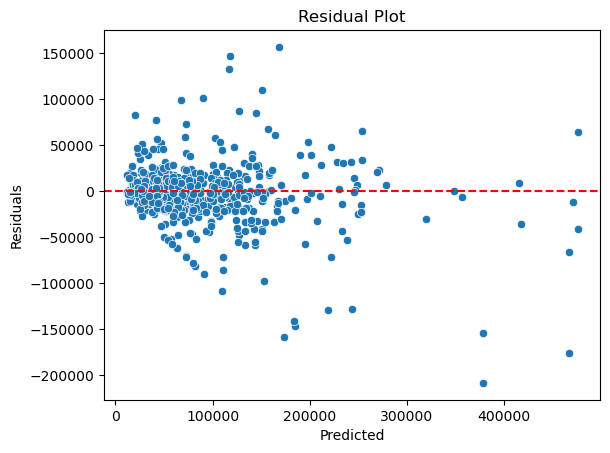

In [126]:
residuals = y_test - y_pred_final

sns.scatterplot(x = y_pred_final, y = residuals)

plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### **Model Generality**

The model does not show kinds of error in both underfitting and overfitting

### **Limitation**

The models used in this machine learning program is not the most efficient compared to other available models.

## Recommendation

Use more complex models.

Generate a confidence interval.

## Save To Pickle

In [72]:
import pickle

In [73]:
best_model_pickle = best_model

best_model_pickle.fit(X, y)

pickle.dump(best_model_pickle, open('model_best_model_pickle.sav', 'wb'))

In [74]:
model_loaded = pickle.load(open('model_bestdt.sav', 'rb'))

model_loaded

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('Binary_Encoder',
                                                  BinaryEncoder(),
                                                  ['Type', 'Region', 'Make']),
                                                 ('Robust_Scaler',
                                                  RobustScaler(),
                                                  ['Engine_Size', 'Mileage']),
                                                 ('OneHot_Encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options'])])),
                ('modeling', KNeighborsRegressor(n_neighbors=3))])

In [75]:
new_data = pd.DataFrame({
    "Type": ["Camry"],
    "Region": ["Riyadh"],
    "Make": ["Toyota"],
    "Gear_Type": ["Automatic"],
    "Origin": ["Saudi"],
    "Options": ["Full"],
    "Year": ["2016"],
    "Engine_Size": [3],
    "Mileage": [120000],
    "Price": [0]
})

In [76]:
model_loaded.predict(new_data)

array([63333.33333333])